# 4.10. final task

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining the path
path = r'C:\Users\dog\Desktop\Instacart Basket Analysis'

In [3]:
# importing pickle file from the previous task
df_ords_prods_custmrs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custmrs.pkl'))

In [121]:
# checking imported data frame 
df_ords_prods_custmrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   order_id                                int64  
 1   user_id                                 int64  
 2   order_number                            int64  
 3   order_dow                               int64  
 4   order_hour_of_day                       int64  
 5   days_since_prior_order                  float64
 6   product_id                              int64  
 7   add_to_cart_order                       int64  
 8   reordered                               int64  
 9   product_name                            object 
 10  aisle_id                                int64  
 11  department_id                           int64  
 12  prices                                  float64
 13  price_range_loc                         object 
 14  busiest_day                     

In [122]:
df_ords_prods_custmrs.shape

(32404859, 35)

In [123]:
df_ords_prods_custmrs.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_orders,mean_price,since_priors_order_median,age,number_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [7]:
df_ords_prods_custmrs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,ordering_frequency,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# dropping unnecessary columns which remained from the previous analysis
df_ords_prods_custmrs = df_ords_prods_custmrs.drop(columns=['Unnamed: 0', 'eval_set', '_merge'])

In [124]:
# checking if the columns were dropped
df_ords_prods_custmrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   order_id                                int64  
 1   user_id                                 int64  
 2   order_number                            int64  
 3   order_dow                               int64  
 4   order_hour_of_day                       int64  
 5   days_since_prior_order                  float64
 6   product_id                              int64  
 7   add_to_cart_order                       int64  
 8   reordered                               int64  
 9   product_name                            object 
 10  aisle_id                                int64  
 11  department_id                           int64  
 12  prices                                  float64
 13  price_range_loc                         object 
 14  busiest_day                     

In [10]:
# dropping first and last name due to GDPR reasons
df_ords_prods_custmrs = df_ords_prods_custmrs.drop(columns=['first_name', 'surname'])

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).


In [125]:
# checking how the states are spelled in the data frame so that we can copy them into the regions creteria 
df_ords_prods_custmrs['state'].value_counts().sort_index()

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [12]:
# checking if all the states from the list are in the data set
df_ords_prods_custmrs['state'].nunique()

51

In [13]:
# separating states into regions

northeast_region = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
             'New Jersey']
midwest_region = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
                  'Kansas','Minnesota','Iowa','Missouri']
south_region = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina',
                'South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama',
                'Oklahoma','Texas','Arkansas','Louisiana']
west_region = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska',
               'Washington','Oregon','California','Hawaii']

In [14]:
# northeast_region
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['state'].isin(northeast_region), 'us_region'] = 'northeast_region'


In [15]:
# midwest_region
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['state'].isin(midwest_region), 'us_region'] = 'midwest_region'


In [16]:
# south_region
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['state'].isin(south_region), 'us_region'] = 'south_region'


In [17]:
# west_region
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['state'].isin(west_region), 'us_region'] = 'west_region'

In [18]:
# checking if the new column was added and if there are any NaN or Null values
df_ords_prods_custmrs['us_region'].nunique(dropna = False)

4

#### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [19]:
df_ords_prods_custmrs['spending_characteristic'].value_counts()

Low spender     31770614
High spender      634245
Name: spending_characteristic, dtype: int64

In [20]:
df_ords_prods_custmrs['us_region'].value_counts()

south_region        10791885
west_region          8292913
midwest_region       7597325
northeast_region     5722736
Name: us_region, dtype: int64

In [21]:
df_region_spending = df_ords_prods_custmrs.groupby(['us_region', 'spending_characteristic']).size().reset_index(name='count')

In [22]:
df_region_spending.head(8).sort_values(by='count', ascending=False)

,us_region,spending_characteristic,count
5,south_region,Low spender,10582194
7,west_region,Low spender,8132559
1,midwest_region,Low spender,7441350
3,northeast_region,Low spender,5614511
4,south_region,High spender,209691
6,west_region,High spender,160354
0,midwest_region,High spender,155975
2,northeast_region,High spender,108225


#### As we can see northeast has the least amount of high spenders. South region is leading in amount of customers (both low and high spenders) There is clear correlation between population of each region and amount of customers. the rest information can be seen in the table 

###

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# creating shell that we can use as a new column for exclusion.
result_less_than_five_orders = []

for value in df_ords_prods_custmrs['max_orders']:
  if value < 5:
    result_less_than_five_orders.append('exclude')
  elif value >= 5:
    result_less_than_five_orders.append('keep')
  else:
    result_busiest_days.append('not available')
      
    
    

In [24]:
# adding new column based on the shell
df_ords_prods_custmrs['exclusion_column_less_than_five_orders'] = result_less_than_five_orders

In [25]:
# checking if the new column was added
df_ords_prods_custmrs['exclusion_column_less_than_five_orders'].value_counts(dropna = False)

keep       30964564
exclude     1440295
Name: exclusion_column_less_than_five_orders, dtype: int64

In [26]:
# creating new data set without customers with total less than 5 orders
df_ords_prods_custmrs_more_than_five_orders = df_ords_prods_custmrs[df_ords_prods_custmrs['exclusion_column_less_than_five_orders'] == 'keep']

In [27]:
# dropping indicator column of the new data set to save memory
df_ords_prods_custmrs_more_than_five_orders = df_ords_prods_custmrs_more_than_five_orders.drop(columns=['exclusion_column_less_than_five_orders'])

In [28]:
# checking new subset 
df_ords_prods_custmrs_more_than_five_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int64  
 1   user_id                    int64  
 2   order_number               int64  
 3   order_dow                  int64  
 4   order_hour_of_day          int64  
 5   days_since_prior_order     float64
 6   product_id                 int64  
 7   add_to_cart_order          int64  
 8   reordered                  int64  
 9   product_name               object 
 10  aisle_id                   int64  
 11  department_id              int64  
 12  prices                     float64
 13  price_range_loc            object 
 14  busiest_day                object 
 15  busiest_days_new           object 
 16  busiest_hours              object 
 17  max_orders                 int64  
 18  customers_loyalty          object 
 19  mean_price                 float64
 20  

In [29]:
# exporting new subset as a pickle
df_ords_prods_custmrs_more_than_five_orders.to_pickle(os.path.join(path,'02 Data','Prepared Data','Task.4.10.less_than_5_orders_subset.pkl'))

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### age profiling and insights

In [30]:
# checking values of age in the data set
df_ords_prods_custmrs['age'].min()

18

In [31]:
df_ords_prods_custmrs['age'].mean()

49.465269853511785

In [32]:
df_ords_prods_custmrs['age'].median()

49.0

In [33]:
df_ords_prods_custmrs['age'].max()

81

In [34]:
df_ords_prods_custmrs['age'].quantile(0.25)

33.0

In [35]:
df_ords_prods_custmrs['age'].quantile(0.50)

49.0

In [36]:
df_ords_prods_custmrs['age'].quantile(0.75)

65.0

In [37]:
# creating shell for the new column    
result_customer_age_profile = []
for value in df_ords_prods_custmrs['age']:
  if value >= 18 and value <33:
    result_customer_age_profile.append('young')
  elif value >= 33 and value <65:
    result_customer_age_profile.append('middle')
  elif value >= 65:
    result_customer_age_profile.append('old')
  else:
    result_customer_age_profile.append('not available')

In [38]:
# creating new column based on the created shell
df_ords_prods_custmrs['age_category'] = result_customer_age_profile

In [126]:
# checking if the column was created
df_ords_prods_custmrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   order_id                                int64  
 1   user_id                                 int64  
 2   order_number                            int64  
 3   order_dow                               int64  
 4   order_hour_of_day                       int64  
 5   days_since_prior_order                  float64
 6   product_id                              int64  
 7   add_to_cart_order                       int64  
 8   reordered                               int64  
 9   product_name                            object 
 10  aisle_id                                int64  
 11  department_id                           int64  
 12  prices                                  float64
 13  price_range_loc                         object 
 14  busiest_day                     

In [40]:
# checking amount per category as well as if there are no NaN
df_ords_prods_custmrs['age_category'].value_counts(dropna = False)

middle    16203962
old        8575084
young      7625813
Name: age_category, dtype: int64

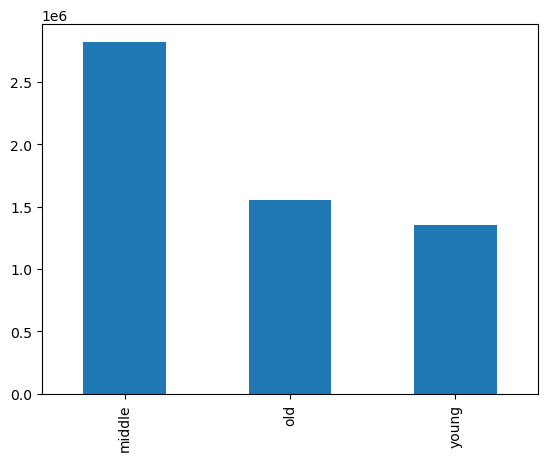

In [41]:
# creating bar chart for northeast_region age category
bar_chart_northeast_region_age_category = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'northeast_region']['age_category'].value_counts().plot.bar()

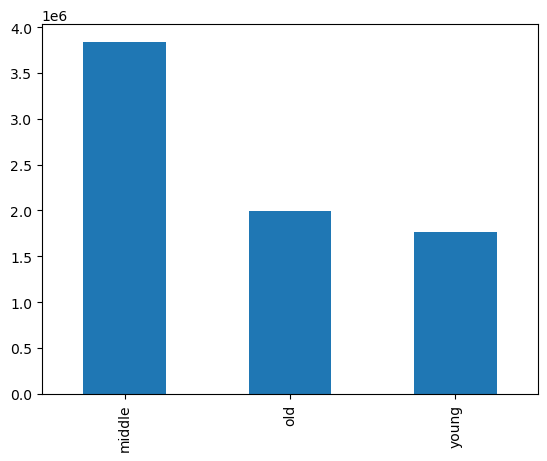

In [42]:
# creating bar chart for midwest_region age category
bar_chart_midwest_region_age_category = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'midwest_region']['age_category'].value_counts().plot.bar()

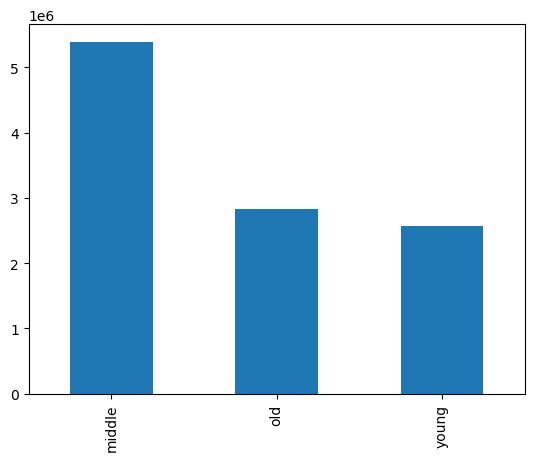

In [43]:
# creating bar chart for south_region age category 
bar_chart_south_region_age_category = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'south_region']['age_category'].value_counts().plot.bar()

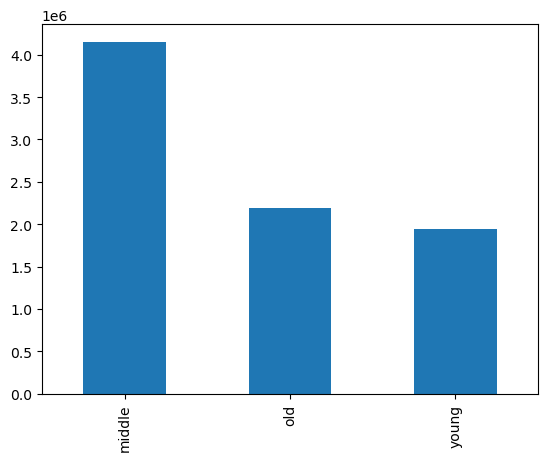

In [44]:
# creating bar chart for west_region age category  
bar_chart_west_region_age_category = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'west_region']['age_category'].value_counts().plot.bar()

In [45]:
# saving all bar charts
bar_chart_northeast_region_age_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and age category','northeast_age.png'))

In [46]:
bar_chart_midwest_region_age_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and age category','midwest_age.png'))

In [47]:
bar_chart_south_region_age_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and age category','south_age.png'))

In [48]:
bar_chart_west_region_age_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and age category','west_age.png'))

In [49]:
#value_counts northeast
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'northeast_region']['age_category'].value_counts()

middle    2819419
old       1553903
young     1349414
Name: age_category, dtype: int64

In [50]:
#value_counts midwest
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'midwest_region']['age_category'].value_counts()

middle    3840212
old       1990844
young     1766269
Name: age_category, dtype: int64

In [51]:
#value_counts south
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'south_region']['age_category'].value_counts()

middle    5391861
old       2836257
young     2563767
Name: age_category, dtype: int64

In [52]:
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'west_region']['age_category'].value_counts()

middle    4152470
old       2194080
young     1946363
Name: age_category, dtype: int64

### among all regions amount of customers per age category is  more or less same. Most customers are in middle age category, then comes older generation and least amount of customers are in young category

# income and age category profiling and insights

In [53]:
# profiling Age group and their income
df_ords_prods_custmrs.groupby('age_category').agg({'income': ['min', 'max', 'mean']})

income                       
                min     max           mean
age_category                              
middle        25903  592409  104555.927875
old           29001  593901  115588.917317
young         25937  396364   70400.463407

#### as older customer is as higher income this customer has

In [54]:
df_ords_prods_custmrs['income'].min()

25903

In [55]:
df_ords_prods_custmrs['income'].mean()

99437.73329450376

In [56]:
df_ords_prods_custmrs['income'].max()

593901

In [57]:
# checking quantiles
df_ords_prods_custmrs['income'].quantile(0.25)

67004.0

In [58]:
df_ords_prods_custmrs['income'].quantile(0.50)

96618.0

In [59]:
df_ords_prods_custmrs['income'].quantile(0.75)

127912.0

In [60]:
# creating shell for the new column    
result_customer_income_profile = []
for value in df_ords_prods_custmrs['income']:
  if  value <96618:
    result_customer_income_profile.append('low income')
  elif value >= 96618 and value <127912:
    result_customer_income_profile.append('middle income')
  elif value >= 127912:
    result_customer_income_profile.append('high income')
  else:
    result_customer_income_profile.append('not available')

In [61]:
# creating new column based on the created shell
df_ords_prods_custmrs['income_category'] = result_customer_income_profile

In [62]:
# checking new category
df_ords_prods_custmrs['income_category'].value_counts().sort_index()

high income       8101288
low income       16202421
middle income     8101150
Name: income_category, dtype: int64

In [63]:
# northeast income value counts
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'northeast_region']['income_category'].value_counts().sort_index()

high income      1440856
low income       2849589
middle income    1432291
Name: income_category, dtype: int64

In [64]:
# midwest income value counts
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'midwest_region']['income_category'].value_counts().sort_index()

high income      1928043
low income       3734391
middle income    1934891
Name: income_category, dtype: int64

In [65]:
# south_region value counts
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'south_region']['income_category'].value_counts().sort_index()

high income      2666255
low income       5475444
middle income    2650186
Name: income_category, dtype: int64

In [66]:
# west_region value counts
df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'west_region']['income_category'].value_counts().sort_index()

high income      2066134
low income       4142997
middle income    2083782
Name: income_category, dtype: int64

In [67]:
# creating a subset of a data frame to see 
df_income_characteristic = df_ords_prods_custmrs.groupby(['us_region', 'income_category']).size().reset_index(name='count')

In [68]:
df_income_characteristic.head(60).sort_values(by=[ 'income_category','count'], ascending=[True, False])

,us_region,income_category,count
6,south_region,high income,2666255
9,west_region,high income,2066134
0,midwest_region,high income,1928043
3,northeast_region,high income,1440856
7,south_region,low income,5475444
10,west_region,low income,4142997
1,midwest_region,low income,3734391
4,northeast_region,low income,2849589
8,south_region,middle income,2650186
11,west_region,middle income,2083782


#### as it is visible in the output above south has the most  population with the highest earners among other regions and northeast has the least high income customers. That explains why the low spender rate is so high in northeast and correlation between income and spending characteristic. There is a clear pattern 

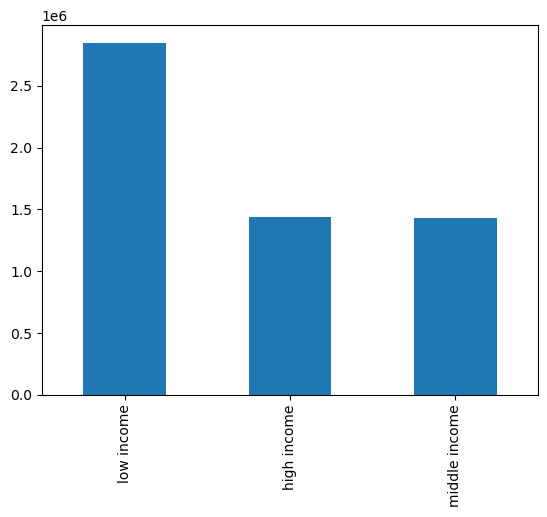

In [132]:
# bar chart northeast age category and income
bar_chart_northeast_region_age_income = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'northeast_region']['income_category'].value_counts().plot.bar()

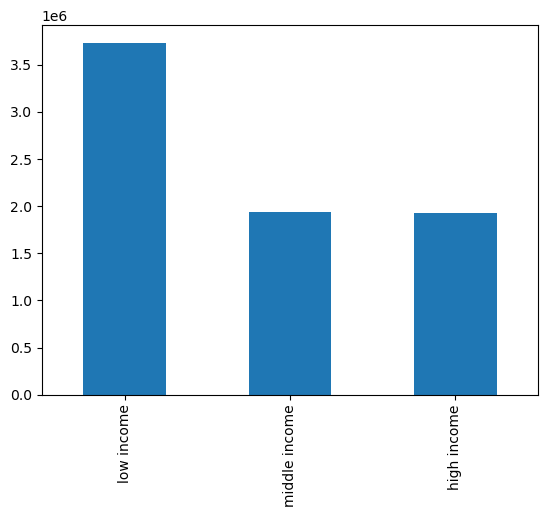

In [70]:
# bar chart midwest age category and income
bar_chart_midwest_region_age_income = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'midwest_region']['income_category'].value_counts().plot.bar()

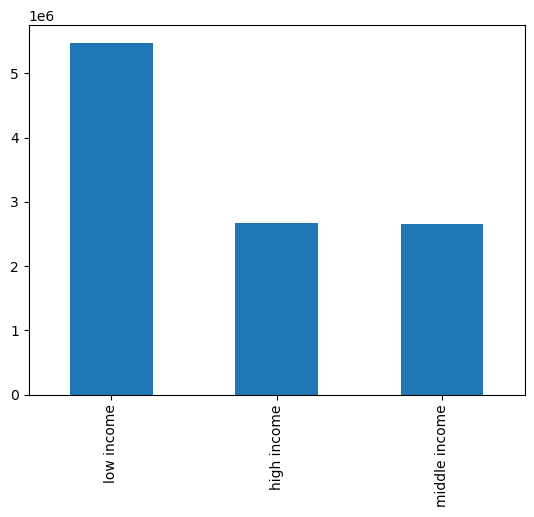

In [71]:
# # bar chart south age category and income
bar_chart_south_region_age_income = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'south_region']['income_category'].value_counts().plot.bar()

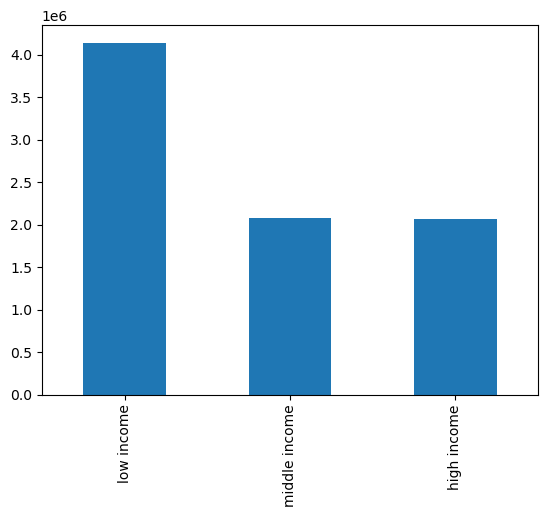

In [72]:
#  bar chart west age category and income
bar_chart_west_region_age_income = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'west_region']['income_category'].value_counts().plot.bar()

In [127]:
# saving all bar charts
bar_chart_northeast_region_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and income category','northeast_income_age.png'))

In [128]:
 bar_chart_midwest_region_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and income category','midwest_income_age.png'))

In [129]:
 bar_chart_south_region_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and income category','south_income_age.png'))

In [130]:
 bar_chart_west_region_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'region and income category','west_income_age.png'))

In [78]:
# checking if there is any differences in the amount of money spent per age category
df_ords_prods_custmrs.groupby('age_category').agg({'prices': ['min', 'max','mean', 'median']})

prices                           
                min      max       mean median
age_category                                  
middle          1.0  99999.0  12.029719    7.4
old             1.0  99999.0  11.768850    7.4
young           1.0  99999.0  12.112746    7.4

#### no clear pattern is visible. the only visible difference is the mean. Older generation spends in average a bit less

In [79]:
# checking if there is any pattern between age group and order dow
df_ords_prods_custmrs.groupby('age_category').agg({'order_dow': ['mean']})

,order_dow
,mean
age_category,
middle,2.739799
old,2.745084
young,2.729895


# no clear pattern is visible. 

In [81]:
df_ords_prods_custmrs.groupby(['age_category', 'us_region']).agg({'order_hour_of_day': ['min','max','mean']})

order_hour_of_day               
                                            min max       mean
age_category us_region                                        
middle       midwest_region                   0  23  13.468339
             northeast_region                 0  23  13.446526
             south_region                     0  23  13.433178
             west_region                      0  23  13.394511
old          midwest_region                   0  23  13.437495
             northeast_region                 0  23  13.394613
             south_region                     0  23  13.397620
             west_region                      0  23  13.476532
young        midwest_region                   0  23  13.400260
             northeast_region                 0  23  13.413261
             south_region                     0  23  13.403941
             west_region                      0  23  13.404798

# there is no clear pattern on the hour of the day between age groups in different regions. Everyone is ordering at the same time in average

In [82]:
# importing departments in order to merge department name with the data set
df_dep = pd.read_csv(r'C:\Users\dog\desktop\Instacart Basket Analysis\02 Data\Prepared Data\departments_wrangled.csv', index_col = False)

In [98]:
df_dep.value_counts()

Unnamed: 0  department     
1           frozen             1
12          meat seafood       1
20          deli               1
19          snacks             1
18          babies             1
17          household          1
16          dairy eggs         1
15          canned goods       1
14          breakfast          1
13          pantry             1
11          personal care      1
2           other              1
10          bulk               1
9           dry goods pasta    1
8           pets               1
7           beverages          1
6           international      1
5           alcohol            1
4           produce            1
3           bakery             1
21          missing            1
dtype: int64

#### babies products and family size comparison

In [84]:
df_ords_prods_custmrs['number_dependants'].value_counts().sort_index()

In [85]:
# creating new column fam size
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['number_dependants'] < 1, 'fam_size'] = 'small'


In [86]:
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['number_dependants'] == 1, 'fam_size'] = 'medium'


In [87]:
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['number_dependants'] == 2, 'fam_size'] = 'big'


In [88]:
df_ords_prods_custmrs.loc[df_ords_prods_custmrs['number_dependants'] >= 3, 'fam_size'] = 'large' 

In [134]:
df_ords_prods_custmrs['fam_size'].value_counts(dropna = False)

large     8135109
small     8097503
big       8091143
medium    8081104
Name: fam_size, dtype: int64

In [94]:
# checking if there is any pattern in family size and baby products ordering
df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["northeast_region"])').groupby('fam_size').size().sort_values(ascending=False)

fam_size
big       19247
large     19074
small     18518
medium    18300
dtype: int64

In [95]:
df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["midwest_region"])').groupby('fam_size').size().sort_values(ascending=False)

fam_size
medium    25541
small     25389
big       24039
large     24014
dtype: int64

In [96]:
df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["south_region"])').groupby('fam_size').size().sort_values(ascending=False)

fam_size
big       39490
small     36345
large     35416
medium    32403
dtype: int64

In [97]:
df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["west_region"])').groupby('fam_size').size().sort_values(ascending=False)

fam_size
large     27590
medium    26995
small     26242
big       25199
dtype: int64

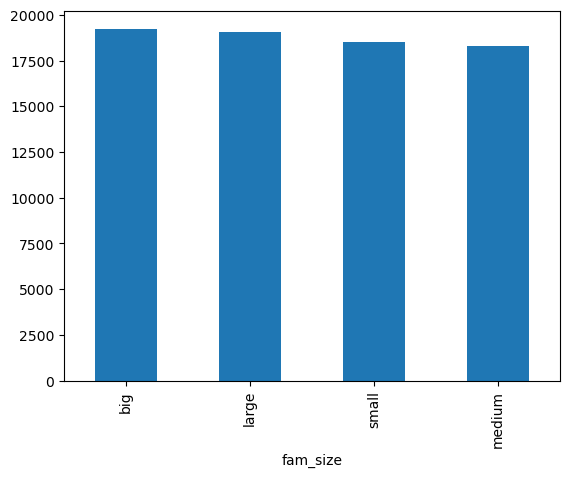

In [140]:
bar_famsize_babyorders_northeast = df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["northeast_region"])').groupby('fam_size').size().sort_values(ascending=False).plot.bar()

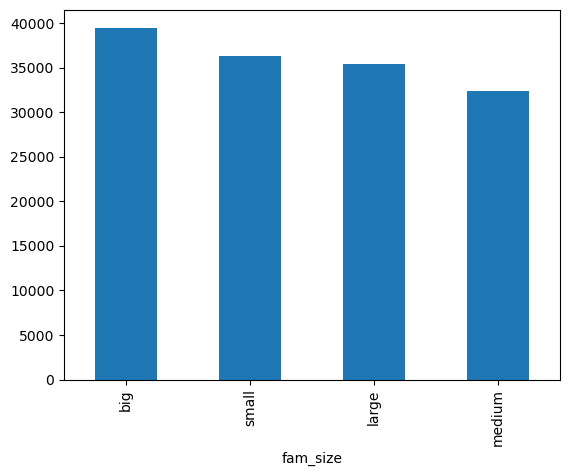

In [141]:
bar_famsize_babyorders_south = df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["south_region"])').groupby('fam_size').size().sort_values(ascending=False).plot.bar()

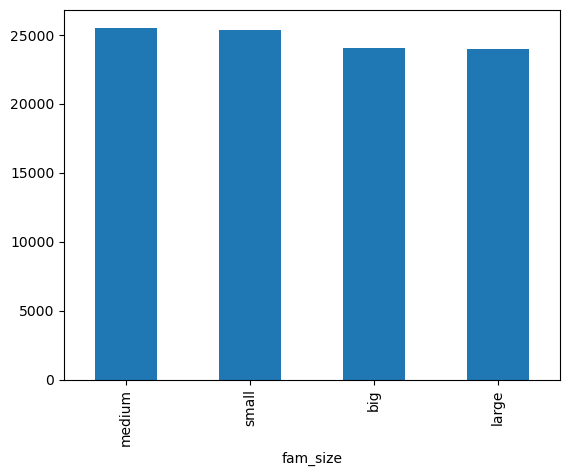

In [142]:
bar_famsize_babyorders_midwest = df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["midwest_region"])').groupby('fam_size').size().sort_values(ascending=False).plot.bar()

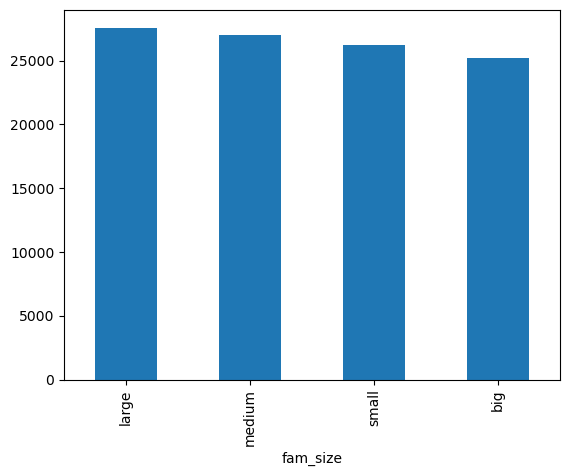

In [143]:
bar_famsize_babyorders_west = df_ords_prods_custmrs.query('department_id.isin([18]) & us_region.isin(["west_region"])').groupby('fam_size').size().sort_values(ascending=False).plot.bar()

In [149]:
bar_famsize_babyorders_northeast.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'famsize and babies orders','northeast_fam_size_babyorders.png'))

In [150]:
bar_famsize_babyorders_south.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'famsize and babies orders','south_fam_size_babyorders.png'))

In [151]:
bar_famsize_babyorders_midwest.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'famsize and babies orders','midwest_fam_size_babyorders.png'))

In [152]:
bar_famsize_babyorders_west.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'famsize and babies orders','west_fam_size_babyorders.png'))

# as we can see there is no clear pattern in family size and baby products ordered

# in some regions we can see that bigger and larger families has more babies orders, however in general it has no clear link to amount of deppendants 

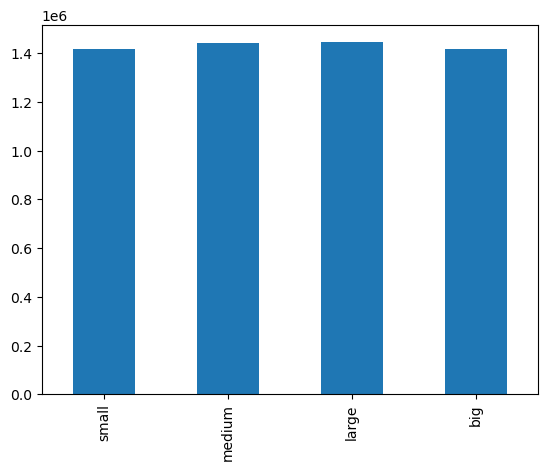

In [113]:
bar_chart_northeast_region_fam = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'northeast_region']['fam_size'].value_counts().sort_index(ascending = False).plot.bar()

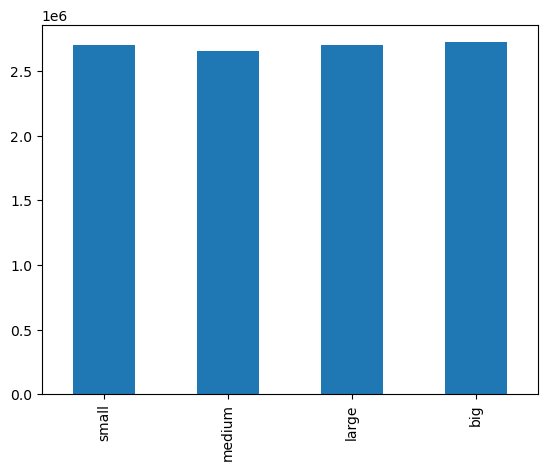

In [114]:
bar_chart_south_region_fam = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'south_region']['fam_size'].value_counts().sort_index(ascending = False).plot.bar()

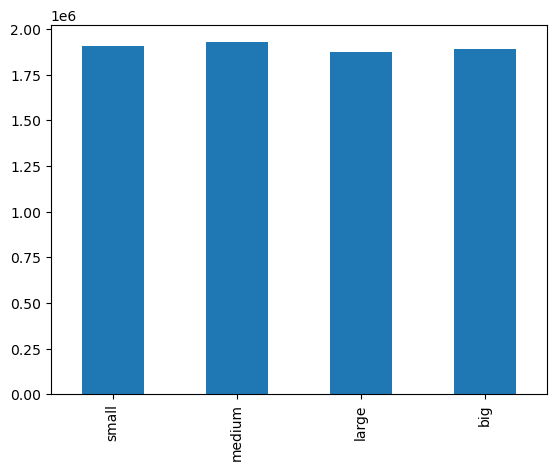

In [115]:
bar_chart_midwest_region_fam = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'midwest_region']['fam_size'].value_counts().sort_index(ascending = False).plot.bar()

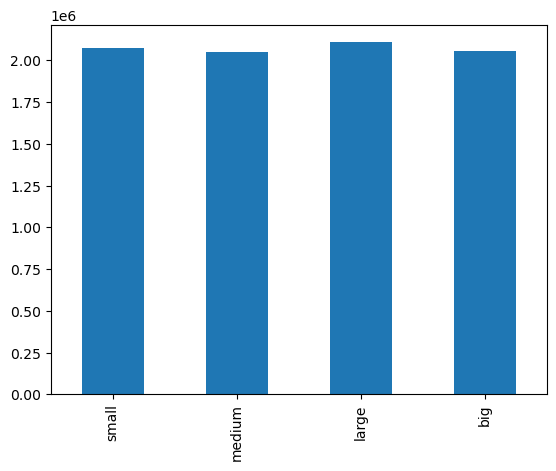

In [116]:
bar_chart_west_region_fam = df_ords_prods_custmrs[df_ords_prods_custmrs['us_region'] == 'west_region']['fam_size'].value_counts().sort_index(ascending = False).plot.bar()

In [117]:
bar_chart_northeast_region_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'family size per region','northeast_region_fam.png'))

In [118]:
bar_chart_south_region_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'family size per region','south_region_fam.png'))

In [119]:
bar_chart_midwest_region_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'family size per region','midwest_region_fam.png'))

In [120]:
bar_chart_west_region_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10. visualization', 'family size per region','west_region_fam.png'))

# it seems that also here there is no clear pattern. Family sizes varies a bit from region to region. However in each region the distribution between family sizes remains almost the same and there is no link to amount of deppendants and region where the customer lives in

In [112]:
df_ords_prods_custmrs['fam_size'].value_counts(dropna = False)

large     8135109
small     8097503
big       8091143
medium    8081104
Name: fam_size, dtype: int64

# generaly distribution amoung the family sizes is equal. There is almost same amount between all the groups. but the largest is the family with 3 dependants

In [153]:
df_ords_prods_custmrs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_prods_custmrs4.10.pkl'))

In [157]:
df_ords_prods_custmrs.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']}).sort_index()

order_number        
                      mean min max
department_id                     
1                15.457838   1  99
2                17.277920   1  99
3                17.170395   1  99
4                17.811403   1  99
5                15.215751   1  99
6                16.439806   1  99
7                17.225802   1  99
8                15.340650   1  99
9                15.895474   1  99
10               20.197148   1  99
11               16.170638   1  99
12               15.887671   1  99
13               16.583536   1  99
14               16.773669   1  99
15               16.165037   1  99
16               17.665606   1  99
17               15.694469   1  99
18               19.310397   1  99
19               17.177343   1  99
20               16.473447   1  99
21               22.902379   1  99

# department 21 20 and 19 has the highest mean accross all the orders

In [159]:
df_ords_prods_custmrs.shape


(32404859, 35)